### Exercise Set 2 - Comparing Regression Algorithms

The answer for the questions for this problem set can be found below.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# SKLearn Imports
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('datasets/Salary_Data.csv')

df.head()

print('\n Salary Data Shape = ', str(df.shape))

print('\nSalary Data Description')
df.describe()


 Salary Data Shape =  (30, 2)

Salary Data Description


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


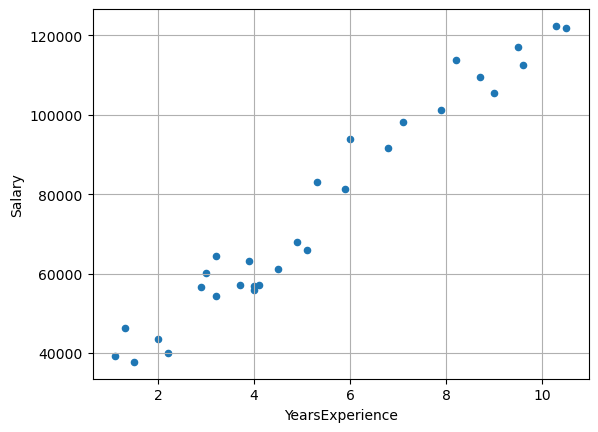

In [3]:
df.plot(kind="scatter", x="YearsExperience", y="Salary", grid=True)

plt.show()

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [5]:
(x_train
 ,x_test
 ,y_train
 ,y_test) = train_test_split(x
                            ,y
                            ,test_size=0.2
                            ,random_state=0)

In [6]:

regression_line = LinearRegression()
regression_line.fit(x_train, y_train)

print("\nCoefficients: \n", regression_line.coef_)
print("\nIntercept: \n", regression_line.intercept_)

r_squared_train = regression_line.score(x_train, y_train)
print("\nR-Squared Train: ", r_squared_train)

r_squared_test = regression_line.score(x_test, y_test)
print("\nR-Squared Test: ", r_squared_test)


Coefficients: 
 [9312.57512673]

Intercept: 
 26780.09915062818

R-Squared Train:  0.9411949620562126

R-Squared Test:  0.988169515729126


#### Visualizing the training set results

In [7]:
def visualize(scatter_x: np.ndarray,
              plot_x: np.ndarray, 
              y: np.ndarray,

              y_pred: np.ndarray, 
              title: str):
    plt.scatter(scatter_x, y, color='red')
    plt.plot(plot_x, y_pred, color='blue')
    plt.title(title)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()

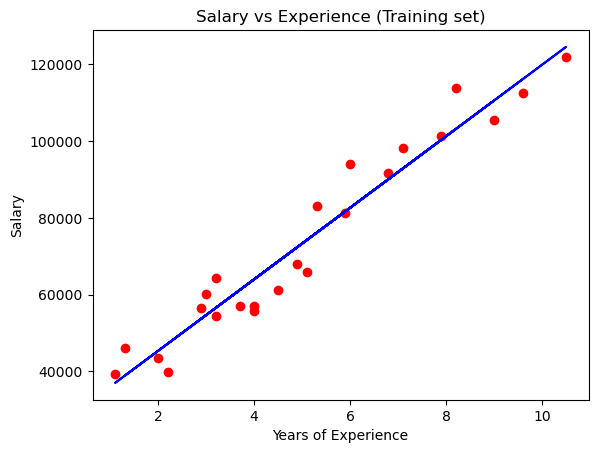

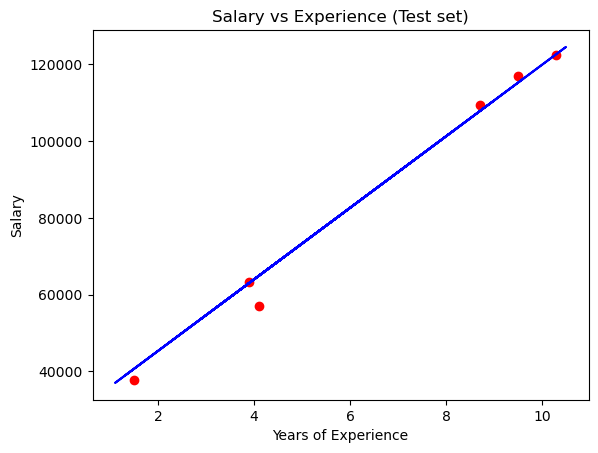

In [8]:
visualize(x_train, x_train, y_train, regression_line.predict(x_train), 'Salary vs Experience (Training set)')
visualize(x_test, x_train, y_test, regression_line.predict(x_train), 'Salary vs Experience (Test set)')

In [9]:
ridge = Ridge().fit(x_train, y_train)

print('Training set score: {:.2f}'.format(ridge.score(x_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(x_test, y_test)))


Training set score: 0.94
Test set score: 0.99


In [10]:
print("Intercepts: ", ridge.intercept_)
print("Coefficients: ", ridge.coef_)


print(f"R-squared value for training set: {ridge.score(x_train, y_train):.2f}")
print(f"R-squared value for test set: {ridge.score(x_test, y_test):.2f}")

Intercepts:  27072.46879105419
Coefficients:  [9254.7755273]
R-squared value for training set: 0.94
R-squared value for test set: 0.99


In [11]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)

print('Training set score: {:.2f}'.format(ridge10.score(x_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(x_test, y_test)))

Training set score: 0.94
Test set score: 0.98


In [12]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)

print('Training set score: {:.2f}'.format(ridge01.score(x_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(x_test, y_test)))

Training set score: 0.94
Test set score: 0.99


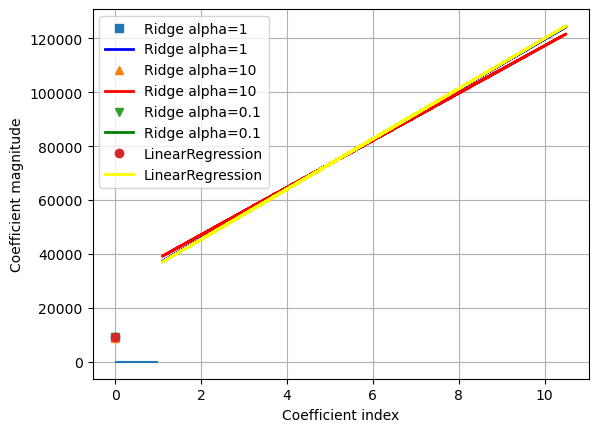

In [13]:
# Start plotting each ridge regression model
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(x_train, ridge.predict(x_train), color='blue', linewidth=2, label="Ridge alpha=1")

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(x_train, ridge10.predict(x_train), color='red', linewidth=2, label="Ridge alpha=10")

plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(x_train, ridge01.predict(x_train), color='green', linewidth=2, label="Ridge alpha=0.1")

plt.plot(regression_line.coef_, 'o', label="LinearRegression")
plt.plot(x_train, regression_line.predict(x_train), color='yellow', linewidth=2, label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(regression_line.coef_))

plt.legend()
plt.grid(True)
plt.show()

#### Lasso Regression

In [14]:
lasso01 = Lasso(alpha=1)
lasso01.fit(x_train, y_train)

print("Training set score: {:.2f}".format(lasso01.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(x_test, y_test)))

Training set score: 0.94
Test set score: 0.99


In [15]:
lasso001 = Lasso(alpha=0.001)
lasso001.fit(x_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(x_test, y_test)))

Training set score: 0.94
Test set score: 0.99


In [16]:
lasso0000001 = Lasso(alpha=0.0000001)
lasso0000001.fit(x_train, y_train)

print("Training set score: {:.2f}".format(lasso0000001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso0000001.score(x_test, y_test)))

Training set score: 0.94
Test set score: 0.99


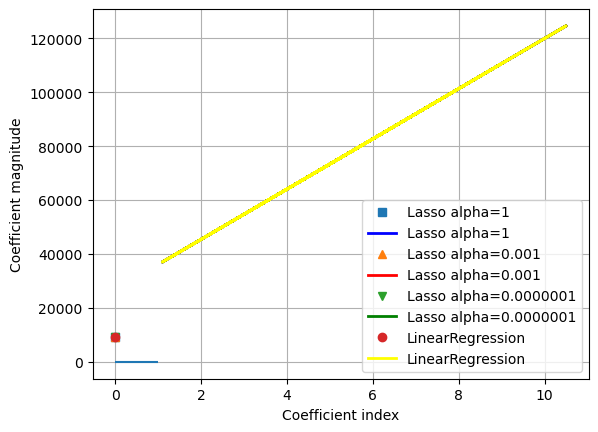

In [17]:
# Start plotting each lasso regression model
plt.plot(lasso01.coef_, 's', label="Lasso alpha=1")
plt.plot(x_train, lasso01.predict(x_train), color='blue', linewidth=2, label="Lasso alpha=1")

plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(x_train, lasso001.predict(x_train), color='red', linewidth=2, label="Lasso alpha=0.001")

plt.plot(lasso0000001.coef_, 'v', label="Lasso alpha=0.0000001")
plt.plot(x_train, lasso0000001.predict(x_train), color='green', linewidth=2, label="Lasso alpha=0.0000001")

plt.plot(regression_line.coef_, 'o', label="LinearRegression")
plt.plot(x_train, regression_line.predict(x_train), color='yellow', linewidth=2, label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(regression_line.coef_))

plt.legend()
plt.grid(True)
plt.show()

#### Questions

##### 1. How will you compare the different linear regression model?
- The different linear regression models can be compared by using the R-squared value. The R-squared value is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

- The R-squared value is a number between 0 and 1. The closer the value is to 1, the better the model fits the data.
##### 2. Which one is better for the data set?
- The Lasso Regression is better for the data set because it has a higher R-squared value.

##### 3. Do you think using these models as a general references helps in evaluating the behavior of the data? Why or why not?
- Yes, because it helps in evaluating the behavior of the data by seeing what kind of linear regression model fits the data better.